# Step 1: Set-up

### Import all the necessary Libraries and Packages for better optimisation of Datasets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

# Step 2: Import Data
### In this step we will introduce the training and testing datasets through exception handling approach

In [3]:
try:
    training_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
    testing_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
except:
    training_df = pd.read_csv('fraudTrain.csv')
    testing_df = pd.read_csv('fraudTest.csv')

In [4]:
training_df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


# Step 3: Data imbalance check
### In this step we will categorize the transactions as Fraud and Genuine and plot the variation in Pie form

In [7]:
fig = px.pie(values=training_df['is_fraud'].value_counts(), names=["Genuine","Fraud"] , width=800, height=500, color_discrete_sequence=["yellow","red"]
             ,title="Fraud v/s Genuine transactions -- Training Data")
fig.show()

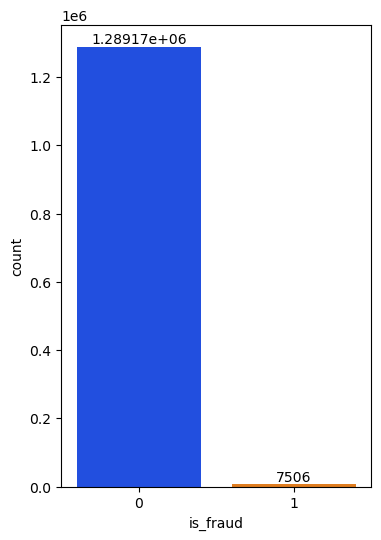

In [8]:
plt.figure(figsize=(4,6))
ax = sns.countplot(x='is_fraud',data=training_df,palette="bright")
for i in ax.containers:
    ax.bar_label(i,)

In [10]:
print('Genuine_Interactions:', round(training_df['is_fraud'].value_counts()[0]/len(training_df) * 100,2), '% of the dataset Transactions')
print('Frauds_Interactions:', round(training_df['is_fraud'].value_counts()[1]/len(training_df) * 100,2), '% of the dataset Transactions')

Genuine_Interactions: 99.42 % of the dataset Transactions
Frauds_Interactions: 0.58 % of the dataset Transactions


# Step 4: Data cleaning
### Here all the excess or deviated Interactions will get identified and removed  

In [11]:
training_df.info(),testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [12]:
training_df.isnull().sum(),testing_df.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

### 1. Drop Columns

In [13]:
# Here all the unwanted and unclassified Columns are removed and verified that are not relevant to predicy fraud transaction among the genuine transactions
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
training_df.drop(columns=drop_columns,inplace=True)
testing_df.drop(columns=drop_columns,inplace=True)

In [14]:
print(training_df.shape)
print(testing_df.shape)

(1296675, 14)
(555719, 14)


### 2. Handle Date time

In [16]:
training_df['trans_date_trans_time']=pd.to_datetime(training_df['trans_date_trans_time'])
training_df['trans_date']=training_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
training_df['trans_date']=pd.to_datetime(training_df['trans_date'])
training_df['dob']=pd.to_datetime(training_df['dob'])

testing_df['trans_date_trans_time']=pd.to_datetime(testing_df['trans_date_trans_time'])
testing_df['trans_date']=testing_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
testing_df['trans_date']=pd.to_datetime(testing_df['trans_date'])
testing_df['dob']=pd.to_datetime(testing_df['dob'])

# Step 5: Data Preprocessing
### Here all the data will get processed before they are taken into the testing session

### 1. Feature Engineering

In [17]:
training_df["age"] = training_df["trans_date"]-training_df["dob"]
training_df["age"]=training_df["age"].astype('timedelta64[Y]')

testing_df["age"] = testing_df["trans_date"]-testing_df["dob"]
testing_df["age"]=testing_df["age"].astype('timedelta64[Y]')

In [18]:
training_df['trans_month'] = pd.DatetimeIndex(training_df['trans_date']).month
training_df['trans_year'] = pd.DatetimeIndex(training_df['trans_date']).year

In [19]:
training_df['latitudinal_distance'] = abs(round(training_df['merch_lat']-training_df['lat'],3))
training_df['longitudinal_distance'] = abs(round(training_df['merch_long']-training_df['long'],3))

testing_df['latitudinal_distance'] = abs(round(testing_df['merch_lat']-testing_df['lat'],3))
testing_df['longitudinal_distance'] = abs(round(testing_df['merch_long']-testing_df['long'],3))

In [20]:
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
training_df.drop(columns=drop_columns,inplace=True)
testing_df.drop(columns=drop_columns,inplace=True)

In [21]:
training_df.gender=training_df.gender.apply(lambda x: 1 if x=="M" else 0)
testing_df.gender=testing_df.gender.apply(lambda x: 1 if x=="M" else 0)

In [22]:
training_df = pd.get_dummies(training_df, columns=['category'], prefix='category')
testing_df = pd.get_dummies(testing_df, columns=['category'], prefix='category')

testing_df = testing_df.reindex(columns=training_df.columns, fill_value=0)

In [23]:
training_df.head(10)

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,1,2019,0.068,0.870,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,1,2019,0.271,0.024,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,1,2019,0.970,0.108,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,1,2019,0.804,0.447,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,1,2019,0.254,0.830,0,...,0,0,0,0,0,1,0,0,0,0
5,94.63,0,2158,0,57.0,1,2019,0.278,0.948,0,...,0,0,0,0,0,0,0,0,0,0
6,44.54,0,2691,0,25.0,1,2019,0.830,0.836,0,...,0,0,0,0,0,0,0,0,0,0
7,71.65,1,6018,0,71.0,1,2019,0.105,0.060,0,...,0,0,0,0,0,0,0,0,0,0
8,4.27,0,1472,0,77.0,1,2019,0.016,0.297,0,...,0,0,0,0,0,1,0,0,0,0
9,198.39,0,151785,0,44.0,1,2019,0.657,0.136,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
testing_df.head(10)

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,0,0,0.020,0.265,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,0,0,0.870,0.476,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,0,0,0.177,0.660,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,0,0,0.243,0.064,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,0,0,0.706,0.868,0,...,0,0,0,0,0,0,0,0,0,1
5,19.55,0,520,0,28.0,0,0,0.447,0.848,0,...,0,0,0,1,0,0,0,0,0,0
6,133.93,0,1139,0,69.0,0,0,0.992,0.914,0,...,0,1,0,0,0,0,0,0,0,0
7,10.37,0,343,0,48.0,0,0,0.740,0.135,0,...,0,0,0,0,0,0,1,0,0,0
8,4.37,1,3688,0,47.0,0,0,0.546,0.115,0,...,0,0,0,0,0,0,0,0,1,0
9,66.54,0,263,0,64.0,0,0,0.124,0.443,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Split Train and Test Data

In [26]:
X_training = training_df.drop('is_fraud', axis=1)
y_training = training_df['is_fraud']
X_testing = testing_df.drop('is_fraud', axis=1)
y_testing = testing_df['is_fraud']

### 3. Handle Data Imbalance

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_training, y_training = smote.fit_resample(X_training, y_training)

### 4. Standardize data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_training)
X_training = scaler.transform(X_training)
X_testing = scaler.transform(X_testing)

# Step 6: Model Building
### Here we will analyse the testing data using various ML models like classifiers and Trees

### 1. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_training, y_training)
y_pred = clf.predict(X_testing)
report = classification_report(y_testing, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.33      0.72      0.45      2145

    accuracy                           0.99    555719
   macro avg       0.67      0.86      0.73    555719
weighted avg       1.00      0.99      0.99    555719



In [42]:
### 2.XGboost



In [36]:
import xgboost as xgb
clf=xgb.XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=3,objective='binary:logistic',random_state=42)
clf.fit(X_training,y_training)
y_pred=clf.predict(X_testing)
report=classification_report(y_testing,y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.22      0.85      0.35      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.92      0.67    555719
weighted avg       1.00      0.99      0.99    555719



In [39]:
### From this we came to the conclusion that when compared to Decision tree, XGboost is offering better and more optimal results for this testing of Fraud detection.